Imports und Weissemodell

In [3]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [4]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [6]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    

#### finden der lambdaposition

In [7]:
m.cpdIdDict

{'si': 0,
 'a': 1,
 'mr': 2,
 'mt': 3,
 'mm': 4,
 'mq': 5,
 'cr': 6,
 'ct': 7,
 'cm': 8,
 'cq': 9,
 'pr': 10,
 'pt': 11,
 'pm': 12,
 'pq': 13,
 'gamma': 14,
 'Iq': 15,
 'lambda': 16}

#### plotten von lambda

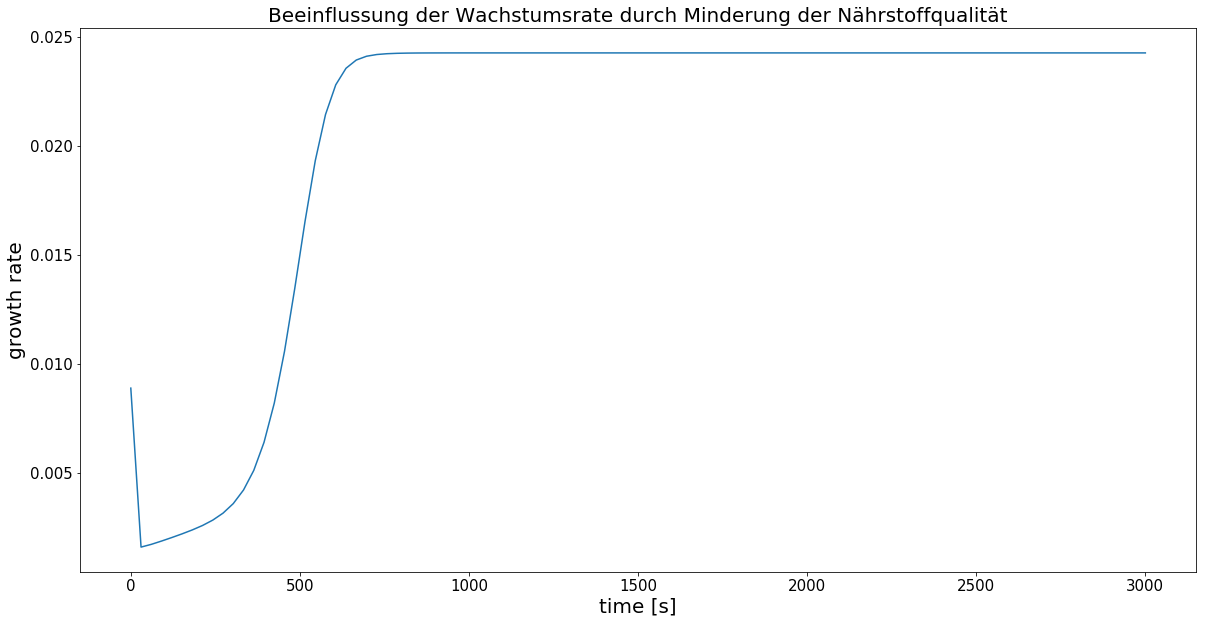

In [8]:
# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#for i, data in enumerate(s.getT()):
plt.plot(s.getT(),s.getY()[:,16], label = 'pr') #valuesOneHundredTimeSteps[i][:,10]
#plt.legend(loc = 'lower right',prop = {'size': 20})

In [9]:
s.getY()[:,16][-1]

0.02426281278190851

In [10]:
sneu.getY()[:,16][-1]

NameError: name 'sneu' is not defined

In [ ]:
plt.plot(s.getT(),s.getY()[:,16])

In [11]:
def Opt(p0):
    
    m = WeisseBaseModel()
    s = modelbase.Simulator(m)
    m.par.dm, m.par.Kgamma, m.par.vt,m.par.Kt, m.par.vm, m.par.Km, m.par.hq, m.par.ku=p0
   
    #                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    s.timeCourse(np.linspace(0,3000,100),weise_values);
    lambdanach = s.getY()[:,16][-1]
    lamda = 100 - lambdanach
    print(lamda)
    
    return (lamda)
 




In [12]:
#weise parameter
init_guess = [0.1,7,726,
              1000,5800,1000,
              4,1]
#nach 1.fit:
#init_guess = [1.00000000e-02, 1.00000000e+00, 7.29190114e+02, 
#              9.99787665e+02, 5.80000000e+03, 1.00000000e+03, 
# .            1.00000000e+01, 1.00000000e-02]
              
bounds = ((0.01,10),(1,100),(100,1000),
          (10,10000),(100,10000),(10,10000),
          (1,10),(0.01,10))

In [13]:
fit = spo.minimize(Opt, init_guess, bounds = bounds)

99.97573718721809
99.97573718722589
99.9757371872234
99.97573718721786
99.9757371872181
99.97573718721809
99.97573718721809
99.9757371871743
99.97573718721333
99.97571689843252
99.97571689844037
99.97571689843784
99.9757168984323
99.97571689843254
99.97571689843252
99.97571689843252
99.97571689838874
99.97571689842776
99.97569660809862
99.9756966081065
99.97569660810393
99.97569660809839
99.97569660809863
99.97569660809862
99.97569660809862
99.97569660805485
99.97569660809387
99.97561546440089
99.97561546440893
99.97561546440623
99.97561546440066
99.9756154644009
99.97561546440089
99.97561546440089
99.97561546435716
99.9756154643962
99.97529116240186
99.97529116241064
99.97529116240733
99.97529116240163
99.97529116240187
99.97529116240186
99.97529116240186
99.97529116235832
99.9752911623974
99.9739967814733
99.97399678148604
99.97399678147927
99.97399678147308
99.97399678147332
99.9739967814733
99.9739967814733
99.97399678143051
99.97399678146975
99.97341477651618
99.97341477653153
99.

In [14]:
fit

      fun: 99.96483342706654
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.54072368e-04,  5.51381163e-04, -1.98951966e-05,  1.42108547e-06,
        0.00000000e+00,  0.00000000e+00, -1.27897692e-04,  7.10542736e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 225
      nit: 10
   status: 0
  success: True
        x: array([1.00000000e-02, 1.00000000e+00, 7.29190114e+02, 9.99787665e+02,
       5.80000000e+03, 1.00000000e+03, 1.00000000e+01, 1.00000000e-02])

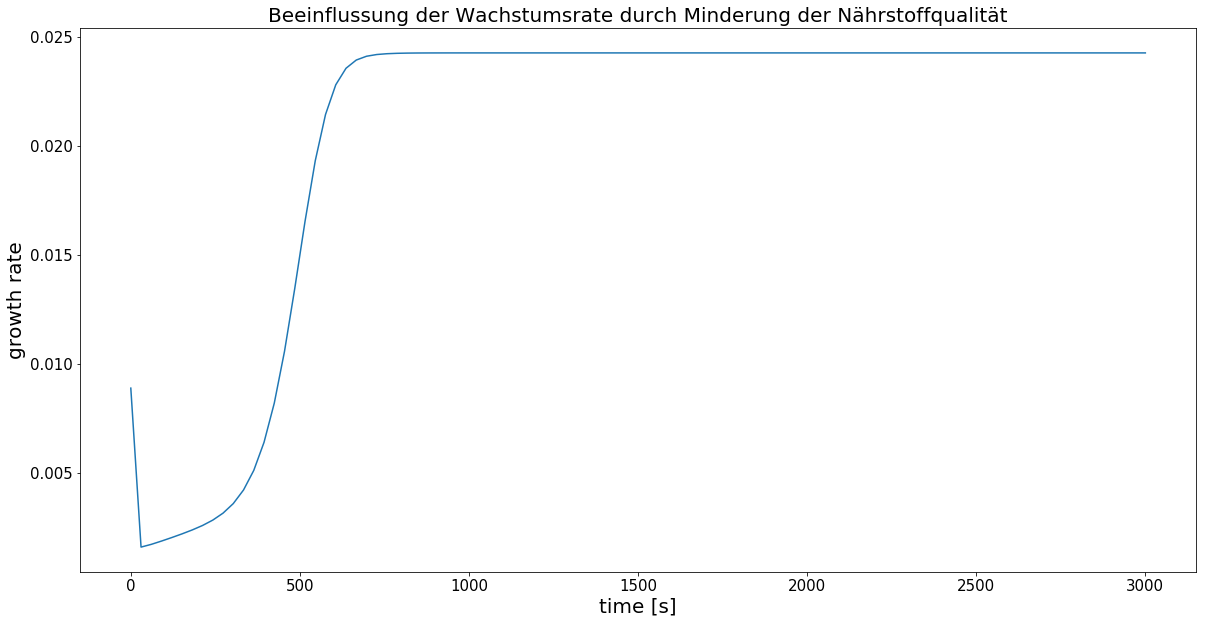

In [15]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.plot(s.getT(),s.getY()[:,16])

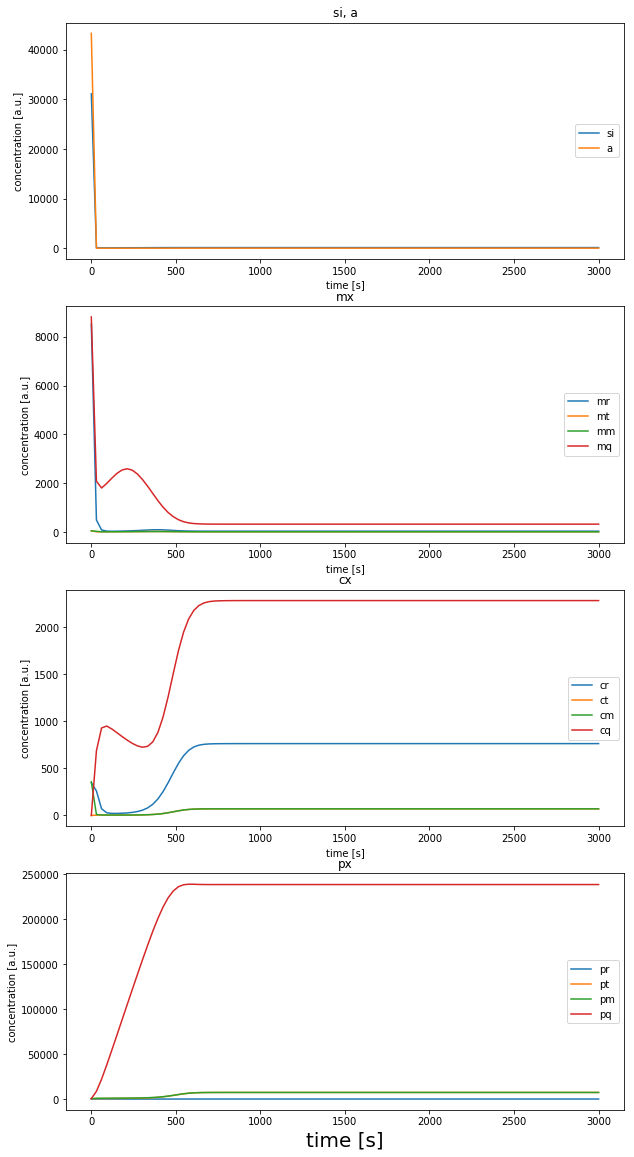

In [16]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(s.getT(),s.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(s.getT(),s.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(s.getT(),s.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')



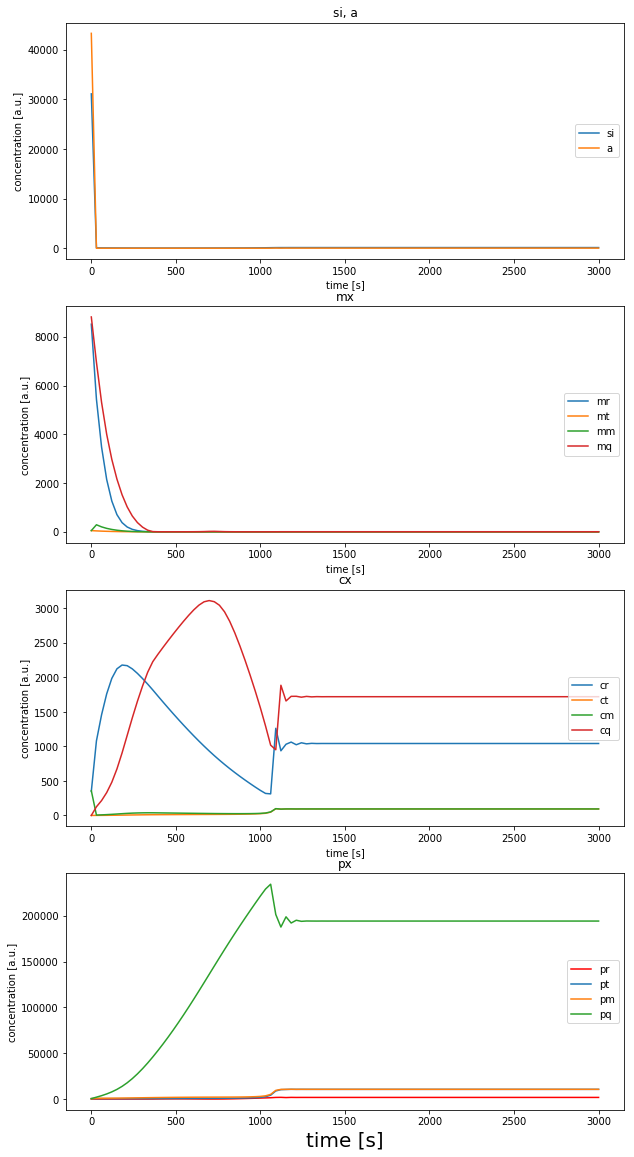

In [19]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[10:11]),'r-', label = cl[10])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')

In [18]:
mneu = WeisseBaseModel()

#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values_neu = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])


mneu.par.update({'dm':1.00000000e-02})
mneu.par.update({'Kgamma': 1.00000000e+00})
mneu.par.update({'vt':7.29190114e+02})
mneu.par.update({'Kt':9.99787665e+02})
mneu.par.update({'vm':5.80000000e+03})
mneu.par.update({'Km':1.00000000e+03})
mneu.par.update({'hq':1.00000000e+01})
mneu.par.update({'ku':1.00000000e-02})

sneu = modelbase.Simulator(mneu)
sneu.timeCourse(np.linspace(0,3000,100),weise_values_neu);



Text(0, 0.5, 'concentration [a.u.]')

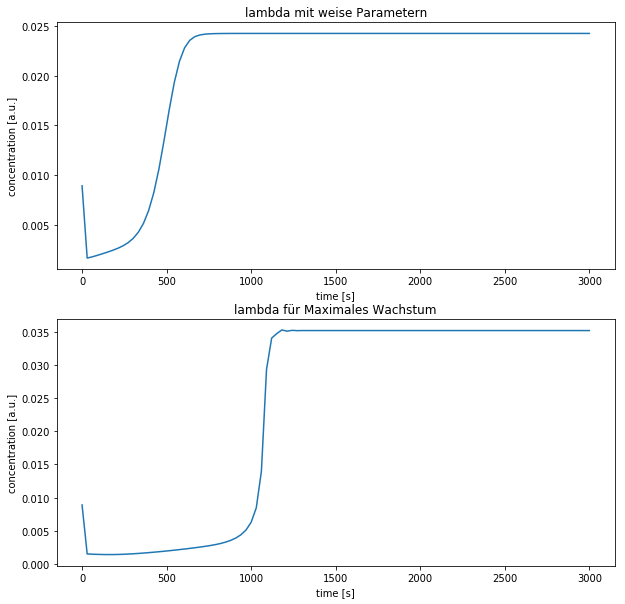

In [20]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getY()[:,16])
Plotlist[0].set_title('lambda mit weise Parametern')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')


Plotlist[1].plot(sneu.getT(),sneu.getY()[:,16])
Plotlist[1].set_title('lambda für Maximales Wachstum')#, size = 20)
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')


(0, 1000)

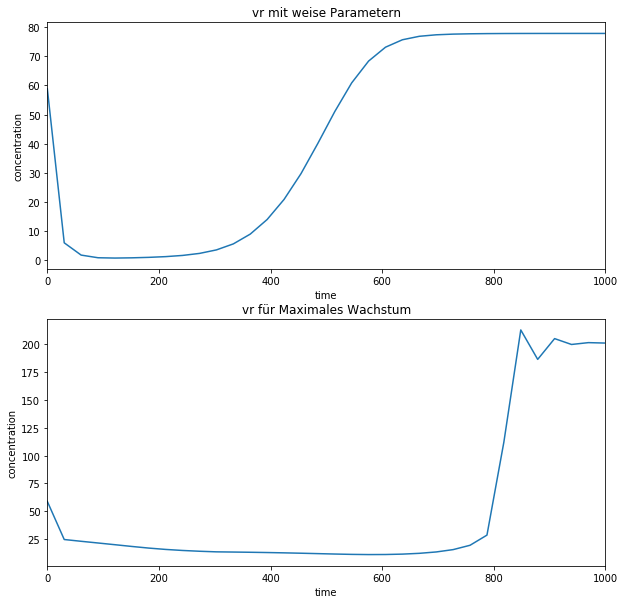

In [16]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[0].set_title('vr mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vr'))
Plotlist[1].set_title('vr für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


(0, 1000)

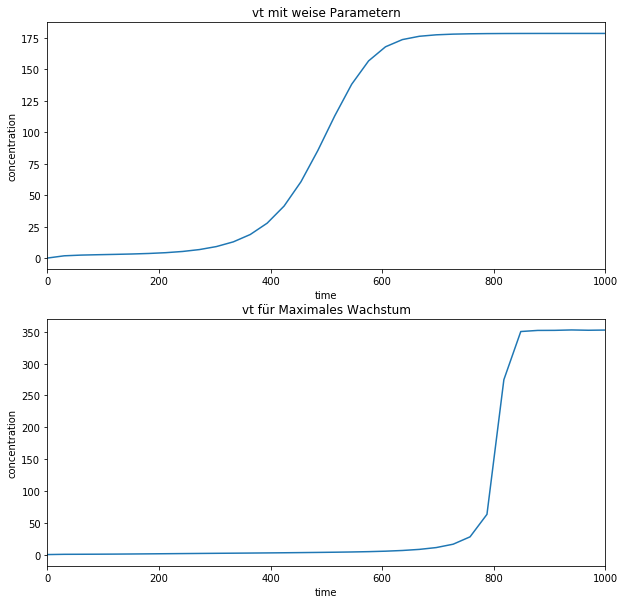

In [17]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vt'))
Plotlist[0].set_title('vt mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vt'))
Plotlist[1].set_title('vt für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

(0, 1000)

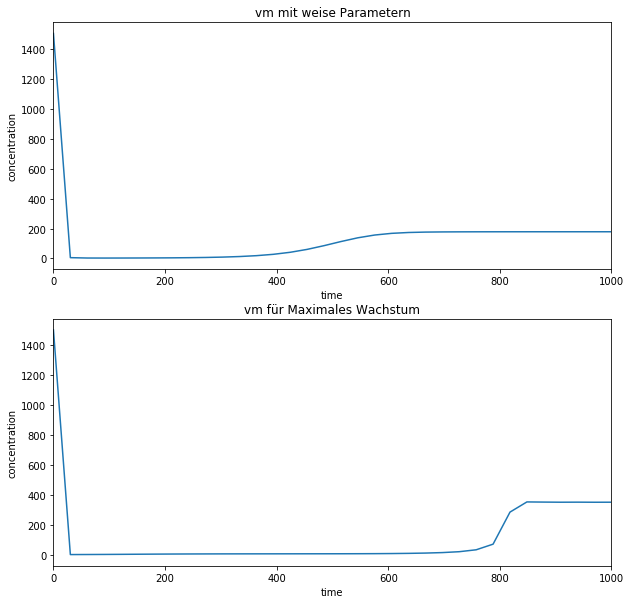

In [18]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

(0, 1000)

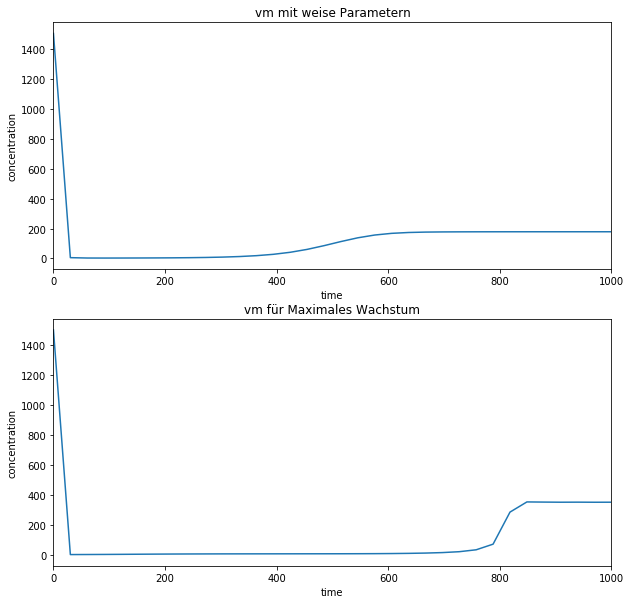

In [19]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

In [215]:
m.stoichiometries

{'vimp': {'si': 1},
 'vcat': {'si': -1, 'a': 0.5},
 'vr': {'a': -7459, 'pr': 2, 'mr': 1, 'cr': -1},
 'vt': {'a': -300, 'pr': 1, 'pt': 1, 'mt': 1, 'ct': -1},
 'vm': {'a': -300, 'pr': 1, 'pm': 1, 'mm': 1, 'cm': -1},
 'vq': {'a': -300, 'pr': 1, 'pq': 1, 'mq': 1, 'cq': -1},
 'cbur': {'pr': -1, 'mr': -1, 'cr': 1},
 'cbut': {'pr': -1, 'mt': -1, 'ct': 1},
 'cbum': {'pr': -1, 'mm': -1, 'cm': 1},
 'cbuq': {'pr': -1, 'mq': -1, 'cq': 1},
 'omegar': {'mr': 1},
 'degmr': {'mr': -1},
 'omegat': {'mt': 1},
 'degmt': {'mt': -1},
 'omegam': {'mm': 1},
 'degmm': {'mm': -1},
 'omegaq': {'mq': 1},
 'degmq': {'mq': -1},
 'dilution_si': {'si': -1},
 'dilution_a': {'a': -1},
 'dilution_mr': {'mr': -1},
 'dilution_mt': {'mt': -1},
 'dilution_mm': {'mm': -1},
 'dilution_mq': {'mq': -1},
 'dilution_cr': {'cr': -1},
 'dilution_ct': {'ct': -1},
 'dilution_cm': {'cm': -1},
 'dilution_cq': {'cq': -1},
 'dilution_pr': {'pr': -1},
 'dilution_pt': {'pt': -1},
 'dilution_pm': {'pm': -1},
 'dilution_pq': {'pq': -1}}